## Hopfield network
### Theoretical background
A Hopfield network is a form of recurrent neural network (RNN) specifically designed for associative memory. It is a simple yet effective model that can store patterns and recall them accurately, even when given incomplete or noisy input.

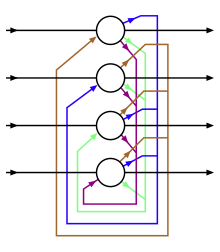

**Key Features:**
* Recurrent: Neurons are interconnected in loops, enabling information to circulate and be repeatedly processed.
* Binary States: Each neuron operates in a binary state, either "on" (1) or "off" (0).
* Symmetric Weights: Connections between neurons are bidirectional, with equal strength in both directions.
* Energy Function: The network's behavior is guided by an energy function, which it works to minimize.

**How It Works:**
* Training: Patterns are stored by adjusting the connection weights between neurons, with each pattern representing a specific stable state.
* Retrieval: Given an input pattern, the network iteratively updates its neurons' states until it converges on a stable state. This stable state corresponds to the stored pattern that best matches the input.

**Applications:**

* Pattern Recognition: Identifying patterns accurately, even with incomplete or noisy inputs.
* Image Restoration: Reconstructing corrupted or missing parts of images.
Optimization: Solving optimization problems, such as the traveling salesman problem.
Content-Addressable Memory: Accessing information based on content rather than address.

**Advantages:**

* Simplicity and Robustness: Straightforward to implement and resistant to noise.
* Associative Memory: Capable of recalling patterns even with partial or noisy inputs.
* Energy Minimization: Provides a clear objective function, aiding in training and analysis.

**Disadvantages:**
* Limited Storage Capacity: Can only store a finite number of patterns before interference occurs.
* Susceptibility to Spurious States: May converge on unwanted local minima.
Not Suited for Complex Tasks: Has limitations with sequential or temporal data.
In essence, a Hopfield network is an effective tool for pattern storage and retrieval, highlighting the potential of neural networks in solving real-world problems.